# <center>nueral-network design for wine-quality dataset</center>
## <center>implemented with keras and torch</center>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.regularizers import l1
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import torch

# <center dir="rtl">از ۲ کتابخانه kerasو torch  جهت یادگیری بیشتر استفاده شده است . </center>


# <div dir="rtl">1.keras:</div>
<div dir="rtl">
ابتدا لازم است که dataset مذکور را بررسی کنیم. به این منظور تعداد داده موجود از هر یک از کلاس ها را بررسی می کنیم. لازم به ذکر است که به دلیل خالی بودن تعدادی از فیلد های dataset این فیلد ها با عدد 0 پر شده اند. همچنین پیش از آغاز پردازش واژه white با عدد 0 و واژه red با عدد 1 جایگزین شده است.
</div>

class 3 :  30.0 , 0.46175157765122365 % of data
class 4 :  216.0 , 3.3246113590888102 % of data
class 5 :  2138.0 , 32.907495767277204 % of data
class 6 :  2836.0 , 43.650915807295675 % of data
class 7 :  1079.0 , 16.60766507618901 % of data
class 8 :  193.0 , 2.9706018162228722 % of data
class 9 :  5.0 , 0.07695859627520395 % of data


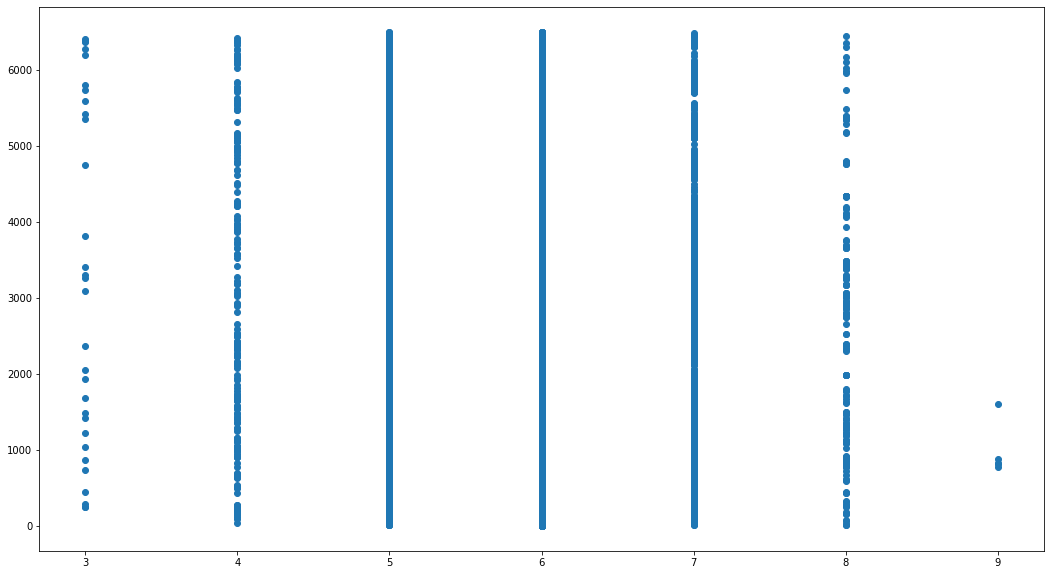

In [5]:
dataframe = pd.read_csv("wine-quality.csv", sep = ',')
dataframe.fillna(0, inplace = True)

plt.figure(figsize=(18, 10))
plt.scatter(dataframe.quality,range(len(dataframe)))
stat = np.zeros((7,1))
for i in range(7):
    stat[i] = len(dataframe[dataframe.quality == i+3])
    print('class', i+3, ': ', stat[i][0], ',', stat[i][0]*100/len(dataframe), '% of data')

<div dir="rtl">
    با توجه به نتایج فوق می توان گفت که 95 درصد داده ها در کلاس های 5و 6و 7 قرار دارند و از طرفی داده های مربوط به این کلاس ها imbalanced هستند. با کاهش تعداد کلاس ها به سه کلاس می توان دقت مدل را افزایش داد و از شدت مشکلات مذکور کاهید ولی به دلیل حفظ صورت مسئله از این کار امتناع کرده ایم. برای حل مشکل imbalanced بودن از روش oversampleing استفاده می کنیم. باید افزود که oversampleing روی داده های مربوط به کلاس های 3و 4و 8و 9 باعث افزایش کاذب accuracy روی trainset می شود.
</div>

<div dir="rtl">
پیش از اعمال oversampleing ویژگی ها را نرمال سازی کرده و lable ها را به one hot vector تبدیل می کنیم. همچنین داده های مربوط به test و validation را جدا می نماییم.
</div>

In [6]:
dataset = dataframe.values
dataset=shuffle(dataset,random_state=45)
X = dataset[:,:12].astype(float)
Y = dataset[:,12].astype(int)
###################################################################
#feature-normalization using mean and std
n = len(X)
X_norm = np.zeros((n, 12))
temp = X.T
for k in range(0, 12):
    new_list = [float(i) for i in list(temp[k])]
    mean = (statistics.mean(new_list))
    std = (statistics.pstdev(new_list))
    for i in range(0, n):
        X_norm[i][k] = (X[i][k] - mean)/std
###################################################################
# converting integer lables to one-hot vectors
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)
###################################################################
#spliting data into 60% train, 28% validation, 12% test
X_train, X_temp, y_train, y_temp = train_test_split( X_norm, dummy_y, test_size = 0.4, random_state = 55) 
X_valid, X_test, y_valid, y_test = train_test_split( X_temp, y_temp, test_size = 0.3, random_state = 65) 
###################################################################
#oversampleing procedure on train set
data_train = np.concatenate((X_train, y_train), axis=1)
#extracting classes 5,6,7
data_3=data_train[data_train[:,12]==1]
data_4=data_train[data_train[:,13]==1]
data_5=data_train[data_train[:,14]==1]
data_6=data_train[data_train[:,15]==1]
data_7=data_train[data_train[:,16]==1]
data_8=data_train[data_train[:,17]==1]
data_9=data_train[data_train[:,18]==1]
#resampleing classes 5 and 7 to make them as much as class 6
data_3 = resample(data_3, 
            replace=True,     # sample with replacement
            n_samples=data_6[:,0].size-data_3[:,0].size,    # to match majority class
            random_state=12)
data_4 = resample(data_4, 
            replace=True,     # sample with replacement
            n_samples=data_6[:,0].size-data_4[:,0].size,    # to match majority class
            random_state=13)
data_5 = resample(data_5, 
            replace=True,     # sample with replacement
            n_samples=data_6[:,0].size-data_5[:,0].size,    # to match majority class
            random_state=14)
data_7 = resample(data_7, 
            replace=True,     # sample with replacement
            n_samples=data_6[:,0].size-data_7[:,0].size,    # to match majority class
            random_state=15)
data_8 = resample(data_8, 
            replace=True,     # sample with replacement
            n_samples=data_6[:,0].size-data_8[:,0].size,    # to match majority class
            random_state=16)
data_9 = resample(data_9, 
            replace=True,     # sample with replacement
            n_samples=data_6[:,0].size-data_9[:,0].size,    # to match majority class
            random_state=17)
#appending resampled data to the train data
data_train=np.append(data_train,data_3,axis=0)
data_train=np.append(data_train,data_4,axis=0)
data_train=np.append(data_train,data_5,axis=0)
data_train=np.append(data_train,data_7,axis=0)
data_train=np.append(data_train,data_8,axis=0)
data_train=np.append(data_train,data_9,axis=0)
#shuffleing to aviod sorted data
data_train=shuffle(data_train,random_state=45)
X_train = data_train[:,:12]
y_train = data_train[:,12:]

<div dir="rtl">
مدلی دارای دو hidden layer که هر لایه دارای 100 نود باشد تعریف می کنیم. به این طریق شبکه overfit می شود. سپس با استفاده از regularization مدل را به مدل just right تبدیل می کنیم.  
    لازم به ذکر است که ابتدا با مدل مذکور ولی 20 نود در هر لایه شروع کرده ایم و پس از چندین بار تست و افزایش نود ها به شبکه فوق الذکر رسیده ایم. ضرایب منتظم سازی نیز پس از تست چندین مقدار رندوم در بازه 0.001 تا 0.01 انتخاب شده اند.
</div>

In [7]:
reg_model = Sequential()
reg_model.add(Dense(20, input_dim=12, activity_regularizer=l1(0.005)))
reg_model.add(Activation('relu'))
reg_model.add(Dense(100, activity_regularizer=l1(0.006)))
reg_model.add(Activation('relu'))
reg_model.add(Dense(100, activity_regularizer=l1(0.004)))
reg_model.add(Activation('relu'))
reg_model.add(Dense(7, activity_regularizer=l1(0.002)))
reg_model.add(Activation('softmax'))

<div dir="rtl">
با استفاده از loss functionِ=categorical-entropy و optimizerِ=Adam شبکه را compile می کنیم.
</div>

In [8]:
reg_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

<div dir="rtl">
مدل را با 150 train، epoch می کنیم.
</div>

In [9]:
history = reg_model.fit(X_train, y_train, epochs = 150,
                        validation_data=(X_valid, y_valid),
                        batch_size = 10, verbose = 1)

Train on 11795 samples, validate on 1819 samples
Epoch 1/150
11795/11795 [==============================] - 4s 314us/step - loss: 2.2250 - accuracy: 0.4426 - val_loss: 2.0731 - val_accuracy: 0.2062
Epoch 2/150
11795/11795 [==============================] - 2s 204us/step - loss: 1.5707 - accuracy: 0.5462 - val_loss: 1.9384 - val_accuracy: 0.2496
Epoch 3/150
11795/11795 [==============================] - 2s 193us/step - loss: 1.4469 - accuracy: 0.5861 - val_loss: 1.8688 - val_accuracy: 0.3079
Epoch 4/150
11795/11795 [==============================] - 2s 204us/step - loss: 1.3791 - accuracy: 0.6059 - val_loss: 1.8302 - val_accuracy: 0.3183
Epoch 5/150
11795/11795 [==============================] - 2s 201us/step - loss: 1.3366 - accuracy: 0.6146 - val_loss: 1.8122 - val_accuracy: 0.3293
Epoch 6/150
11795/11795 [==============================] - 2s 202us/step - loss: 1.3005 - accuracy: 0.6289 - val_loss: 1.8344 - val_accuracy: 0.3051
Epoch 7/150
11795/11795 [==============================] 

<div dir="rtl">
    نمودار زیر نشان دهنده تغییرات accuracy به ازاء هر epoch است.
</div>

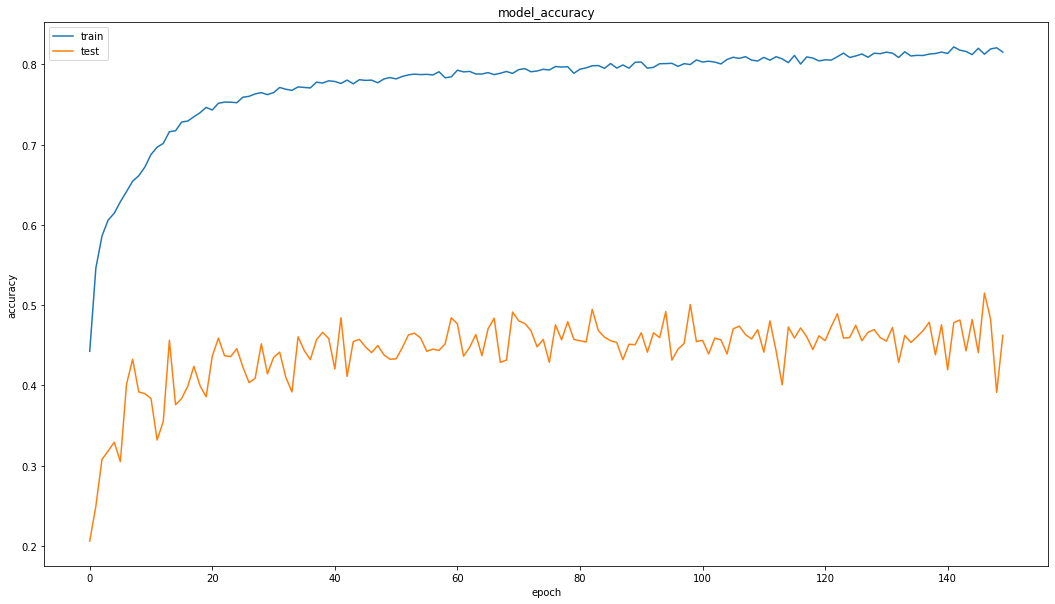

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# reg_model.summary()

<div dir="rtl">
    عملکرد شبکه را به ازاء X_test بررسی می کنیم.
</div>

In [11]:
reg_model.evaluate(X_test, y_test)

780/780 [==============================] - 0s 54us/step


[2.7106945746984237, 0.485897421836853]

<div dir="rtl">
    با توجه به این که داده ها imbalanced هستند مقدار precision و recall و f1score را برای هر کلاس روی train set محاسبه می کنیم.
</div>

In [12]:
#prediction of y_test
Y_pred = reg_model.predict(X_test)
#converting one-hot vector to lable
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

#calculateing confusion matrix
print(confusion_matrix(y_true, y_pred))
#calculateing precision recall fscore
#firs array = precision
#second array = recall
#third array = fscore
#forth array = number of available sets in each class
precision_recall_fscore_support(y_true, y_pred, average=None, zero_division=1)

[[  0   1   1   0   0   0   0]
 [  0   9  10   6   2   1   0]
 [  0  35 116  66  15   6   0]
 [  1  24  53 160  98  18   1]
 [  1   0   4  23  84  22   1]
 [  0   0   0   4   8  10   0]
 [  0   0   0   0   0   0   0]]


(array([0.        , 0.13043478, 0.63043478, 0.61776062, 0.4057971 ,
        0.1754386 , 0.        ]),
 array([0.        , 0.32142857, 0.48739496, 0.45070423, 0.62222222,
        0.45454545, 1.        ]),
 array([0.        , 0.18556701, 0.54976303, 0.52117264, 0.49122807,
        0.25316456, 0.        ]),
 array([  2,  28, 238, 355, 135,  22,   0], dtype=int64))

<div dir="rtl">
    با توجه به بررسی های انجام شده روی مجموعه داده می توان گفت که پیش بینی برچسب داده های مربوط به کلاس 6 تقریبا غیر ممکن است چرا که تنها حدود 40 درصد داده ی مربوطه دارای ویژگی های منحصر به کلاس 6 هستند. این امر سبب شده است که شبکه نه تنها در تشخیص کلاس 6 بلکه در تشخیص سایر کلاس ها نیز دچار مشکل شود. 
</div>

<div dir="rtl">
    همچنین نظر بر این که امتیاز اختصاص داده شده به هر نمونه بر اساس حس چشایی بوده و نه بر اساس داده های شیمیایی جمع آوری شده، مطابق مسئله marry's room می توان گفت پیش بینی دقیق امتیاز نمونه ها صرفاً با محاسبات ریاضی مقدور نیست. 
</div>

<div dir="rtl">
در نهایت می توان گفت اگر از یک واحد خطا صرف نظر کنیم میزان دقت زیر را خواهیم داشت:
</div>

In [13]:
sum = 0.0;
for i in range(len(y_true)):
    if y_pred[i]>=y_true[i]-1 and y_pred[i]<=y_true[i]+1:
        sum = sum+1
print('accuracy for tolerance=1: ', sum*100/len(y_true))

accuracy for tolerance=1:  89.1025641025641


resources:  
https://keras.io/  
          https://scikit-learn.org  
           some articles on https://scholar.google.com/

# <div dir="rtl">2.torch:</div>
<div dir="rtl">از همان داده های قبلی استفاده میکنیم.</div>

In [12]:
Xtrain=X_train.astype('float32')
# Ytrain=np.argmax(y_train, axis=1)
Ytrain=y_train.astype('float32')

Xtest=X_test.astype('float32')
Ytest=y_test.astype('float32')
# print(Xtrain)
# print(np.argmax(Ytrain, axis=1))

<div dir="rtl">مثل مدلی که در keras استفاده شده بود همان مدل را دوباره پیاده سازی میکنیم با این تفاوت که از تابع هزینه MSE استفاده میشود</div>

In [14]:
class model3():
    def __init__(self,NumberOfSample,InputSize,NumberOfNeorun,OutputSize,loss_fn,Epoch,learning_rate,optimizer):
        self.N=NumberOfSample
        self.D_in=InputSize
        self.H=NumberOfNeorun
        self.D_out=OutputSize
        self.Epoch=Epoch
        self.loss_fn=loss_fn
        self.learning_rate=learning_rate
        self.correct=[]
        self.losses=[]
        self.model = torch.nn.Sequential(
                torch.nn.Linear(self.D_in, 20),
                torch.nn.ReLU(),
                torch.nn.Linear(20, self.H),
                torch.nn.ReLU(),
                torch.nn.Linear(self.H, self.H),
                torch.nn.ReLU(),
    
                torch.nn.Linear(self.H, self.D_out),
                    torch.nn.ReLU(),
                #     torch.nn.Linear(H, 10),
    
    
    
    
                torch.nn.Softmax(dim=1),
    
    
                )
        self.optimizer=optimizer(self.model.parameters(),lr=self.learning_rate)
        
    def run(self,X,Y):
        
        
        self.correct=[]
        self.losses=[]
        x = torch.from_numpy(X)
        y = torch.from_numpy(Y)
    
        for t in range(self.Epoch):

            # Forward pass: compute predicted y by passing x to the model. Module objects
            # override the __call__ operator so you can call them like functions. When
            # doing so you pass a Tensor of input data to the Module and it produces
            # a Tensor of output data.
        #     print(x[1])
            y_pred = self.model(x)
        #     print(y)
        #     print(y_pred)
            # Compute and print loss. We pass Tensors containing the predicted and true
            # values of y, and the loss function returns a Tensor containing the
            # loss.
            loss = self.loss_fn(y_pred, y)
        #     print(y_pred)
            self.losses.append(loss)


            # Zero the gradients before running the backward pass.
            self.optimizer.zero_grad()

            # Backward pass: compute gradient of the loss with respect to all the learnable
            # parameters of the model. Internally, the parameters of each Module are stored
            # in Tensors with requires_grad=True, so this call will compute gradients for
            # all learnable parameters in the model.
            loss.backward()

            # Update the weights using gradient descent. Each parameter is a Tensor, so
            # we can access its gradients like we did before.
            self.optimizer.step()
            self.correct.append((np.argmax(y_pred.detach().numpy(),axis=1)==(np.argmax(Y,axis=1))).sum()/Y[:,0].size)
            if t % 100 == 99:
                print(t,'Loss:' ,loss.item(),'Accuracy:' ,self.correct[-1])


        return self.model,self.correct
    
    
    def predict(self,x):
        return np.argmax(self.model(torch.from_numpy(x)).detach().numpy(),axis=1)
    
    def accuracy(self,y_pred,y):
        return (y_pred==y.T).sum()/y.size
        


                
ss = model3(1000, 12, 100, 7,torch.nn.MSELoss(),500,1e-3,torch.optim.Adam)

predict2,correct2=ss.run(Xtrain,Ytrain)




99 Loss: 0.08685053139925003 Accuracy: 0.5146248410343366
199 Loss: 0.07169666886329651 Accuracy: 0.6384908859686308
299 Loss: 0.061048153787851334 Accuracy: 0.7383637134378974
399 Loss: 0.05527322366833687 Accuracy: 0.7788045782111064
499 Loss: 0.051565006375312805 Accuracy: 0.7790589232725731


<div dir="rtl">سرعت کتابخانه torch بالاتر از keras هست، در نتیجه از تعداد epoch بیشتر استفاده میکنیم(۵۰۰)</div>
<div dir="rtl">به دقت 76 درصد میرسیم</div>

0.7790589232725731


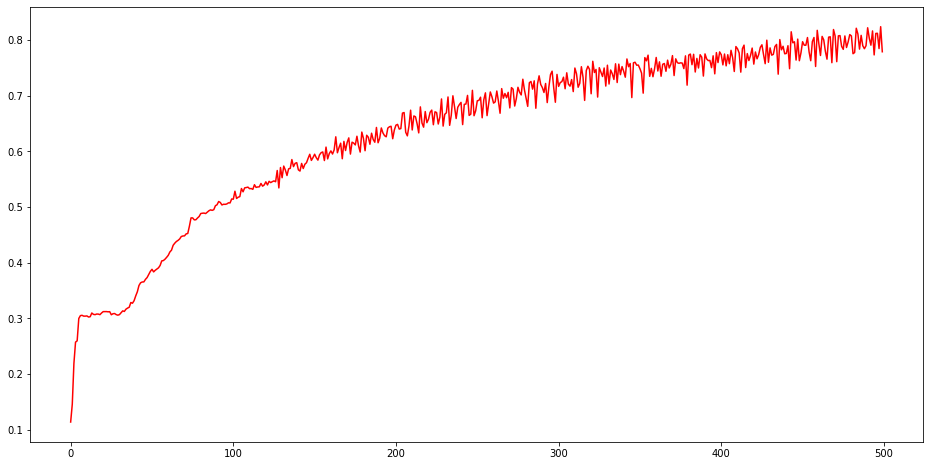

In [15]:
fig, axes = plt.subplots(figsize=(16,8),nrows=1,ncols=1)
axes.plot(correct2,'r-')

print(correct2[-1])

[3 1 0 ... 1 1 1]
0.8122085629504027
0.48205128205128206


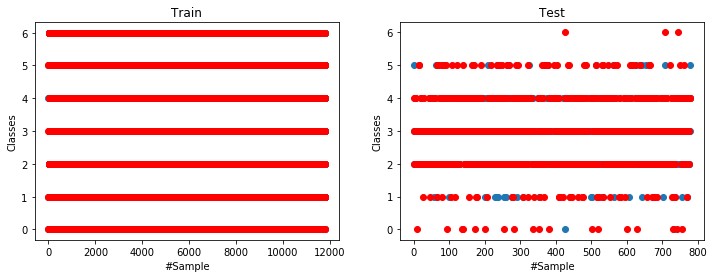

In [18]:
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
y_pred_Train=ss.predict(Xtrain)
yshow=np.argmax(Ytrain,axis=1)
print(y_pred_Train)
axes[0].scatter(range(yshow.size),yshow)
axes[0].plot(range(y_pred_Train.size),y_pred_Train,"ro")
axes[0].set_title('Train')
axes[0].set_xlabel('#Sample')
axes[0].set_ylabel('Classes')
print(ss.accuracy(y_pred_Train,yshow))


y_pred_Test=ss.predict(Xtest)
yshowtest=np.argmax(Ytest,axis=1)
# print(y_pred_Train)
axes[1].scatter(range(yshowtest.size),yshowtest)
axes[1].plot(range(y_pred_Test.size),y_pred_Test,"ro")
axes[1].set_title('Test')
axes[1].set_xlabel('#Sample')
axes[1].set_ylabel('Classes')
print(ss.accuracy(y_pred_Test,yshowtest))



<div dir="rtl">
در نهایت می توان گفت اگر از یک واحد خطا صرف نظر کنیم میزان دقت زیر را خواهیم داشت:
</div>

In [19]:

sum = 0.0;
for i in range(len(yshowtest)):
    if y_pred_Test[i]>=yshowtest[i]-1 and y_pred_Test[i]<=yshowtest[i]+1:
        sum = sum+1
print('accuracy for tolerance=1: ', sum*100/len(yshowtest))

accuracy for tolerance=1:  90.25641025641026
